In [2]:
import zipfile
import os

# Define paths
zip_path = "C:\Medicine Mismatch Detector\A-Z medicine dataset of india.zip"
extract_folder = "/content/extracted_data" # Changed to a directory path

# Create the extraction directory if it doesn't exist
os.makedirs(extract_folder, exist_ok=True)

# Extract the contents of the ZIP file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)

# List extracted files
extracted_files = os.listdir(extract_folder)
extracted_files

<>:5: SyntaxWarning: invalid escape sequence '\M'
<>:5: SyntaxWarning: invalid escape sequence '\M'
C:\Users\Dimpal\AppData\Local\Temp\ipykernel_872\3275669946.py:5: SyntaxWarning: invalid escape sequence '\M'
  zip_path = "C:\Medicine Mismatch Detector\A-Z medicine dataset of india.zip"


['A_Z_medicines_dataset_of_India.csv']

In [3]:
import pandas as pd

# Load the medicine dataset
file_path = "C:\Medicine Mismatch Detector\A-Z medicine dataset of india\A_Z_medicines_dataset_of_India.csv"
df = pd.read_csv(file_path)

# View first 5 rows
df.head()

<>:4: SyntaxWarning: invalid escape sequence '\M'
<>:4: SyntaxWarning: invalid escape sequence '\M'
C:\Users\Dimpal\AppData\Local\Temp\ipykernel_872\3055669782.py:4: SyntaxWarning: invalid escape sequence '\M'
  file_path = "C:\Medicine Mismatch Detector\A-Z medicine dataset of india\A_Z_medicines_dataset_of_India.csv"


,id,name,price(₹),Is_discontinued,manufacturer_name,type,pack_size_label,short_composition1,short_composition2
0,1,Augmentin 625 Duo Tablet,223.42,False,Glaxo SmithKline Pharmaceuticals Ltd,allopathy,strip of 10 tablets,Amoxycillin (500mg),Clavulanic Acid (125mg)
1,2,Azithral 500 Tablet,132.36,False,Alembic Pharmaceuticals Ltd,allopathy,strip of 5 tablets,Azithromycin (500mg),NaN
2,3,Ascoril LS Syrup,118.00,False,Glenmark Pharmaceuticals Ltd,allopathy,bottle of 100 ml Syrup,Ambroxol (30mg/5ml),Levosalbutamol (1mg/5ml)
3,4,Allegra 120mg Tablet,218.81,False,Sanofi India Ltd,allopathy,strip of 10 tablets,Fexofenadine (120mg),NaN
4,5,Avil 25 Tablet,10.96,False,Sanofi India Ltd,allopathy,strip of 15 tablets,Pheniramine (25mg),NaN


In [4]:
# Check columns and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253973 entries, 0 to 253972
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  253973 non-null  int64  
 1   name                253973 non-null  object 
 2   price(₹)            253973 non-null  float64
 3   Is_discontinued     253973 non-null  bool   
 4   manufacturer_name   253973 non-null  object 
 5   type                253973 non-null  object 
 6   pack_size_label     253973 non-null  object 
 7   short_composition1  253973 non-null  object 
 8   short_composition2  112171 non-null  object 
dtypes: bool(1), float64(1), int64(1), object(6)
memory usage: 15.7+ MB


In [5]:
# Clean column names
df.columns = [col.strip().lower().replace(' ', '_') for col in df.columns]
df.columns

Index(['id', 'name', 'price(₹)', 'is_discontinued', 'manufacturer_name',
       'type', 'pack_size_label', 'short_composition1', 'short_composition2'],
      dtype='object')

In [6]:
# it will count the missing values
df.isnull().sum()
df.fillna("Unknown", inplace=True)

In [7]:
#
df['name'].nunique()
df['name'].unique()[:10]

array(['Augmentin 625 Duo Tablet', 'Azithral 500 Tablet',
       'Ascoril LS Syrup', 'Allegra 120mg Tablet', 'Avil 25 Tablet',
       'Allegra-M Tablet', 'Amoxyclav 625 Tablet', 'Azee 500 Tablet',
       'Atarax 25mg Tablet', 'Ascoril D Plus Syrup Sugar Free'],
      dtype=object)

In [8]:
# Select important columns
df_clean = df[["name", "short_composition1", "short_composition2", "manufacturer_name", "type", "is_discontinued"]].copy()

# Fill missing values with empty strings
df_clean["short_composition1"].fillna("", inplace=True)
df_clean["short_composition2"].fillna("", inplace=True)

# Combine both compositions
df_clean["full_composition"] = df_clean["short_composition1"].str.strip() + " | " + df_clean["short_composition2"].str.strip()

# Drop duplicates
df_clean.drop_duplicates(subset=["name", "full_composition"], inplace=True)

# Reset index
df_clean.reset_index(drop=True, inplace=True)

# Preview
print(df_clean.head())

                       name     short_composition1  \
0  Augmentin 625 Duo Tablet  Amoxycillin  (500mg)    
1       Azithral 500 Tablet   Azithromycin (500mg)   
2          Ascoril LS Syrup   Ambroxol (30mg/5ml)    
3      Allegra 120mg Tablet   Fexofenadine (120mg)   
4            Avil 25 Tablet     Pheniramine (25mg)   

           short_composition2                     manufacturer_name  \
0     Clavulanic Acid (125mg)  Glaxo SmithKline Pharmaceuticals Ltd   
1                     Unknown           Alembic Pharmaceuticals Ltd   
2   Levosalbutamol (1mg/5ml)           Glenmark Pharmaceuticals Ltd   
3                     Unknown                     Sanofi India  Ltd   
4                     Unknown                     Sanofi India  Ltd   

        type  is_discontinued                                full_composition  
0  allopathy            False  Amoxycillin  (500mg) | Clavulanic Acid (125mg)  
1  allopathy            False                  Azithromycin (500mg) | Unknown  
2  allop

C:\Users\Dimpal\AppData\Local\Temp\ipykernel_872\2687183456.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean["short_composition1"].fillna("", inplace=True)
C:\Users\Dimpal\AppData\Local\Temp\ipykernel_872\2687183456.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

Fo

In [9]:
import random

# Use the cleaned dataframe as the drug list
drug_list = df_clean

# Set sample size (e.g., 10,000 pairs)
sample_size = 10000

# Get total number of drugs
n = len(drug_list)

# Generate random unique index pairs (i, j) where i < j
sample_pairs = set()
while len(sample_pairs) < sample_size:
    i = random.randint(0, n - 2)
    j = random.randint(i + 1, n - 1)
    sample_pairs.add((i, j))

# Build the sample pair dataframe
pair_data = [{
    "drug1": drug_list.iloc[i]["name"],
    "composition1": drug_list.iloc[i]["full_composition"],
    "drug2": drug_list.iloc[j]["name"],
    "composition2": drug_list.iloc[j]["full_composition"]
} for i, j in sample_pairs]

pair_df = pd.DataFrame(pair_data)

# Show a few examples
print(pair_df.head())

                            drug1  \
0     Azonim P 100mg/325mg Tablet   
1        Mefkind Forte Suspension   
2      Actcalm AT 5mg/50mg Tablet   
3           Cefdoxim 200mg Tablet   
4  Cipanate CV 200mg/125mg Tablet   

                                        composition1  \
0           Nimesulide (100mg) | Paracetamol (325mg)   
1  Mefenamic Acid (50mg/5ml) | Paracetamol (125mg...   
2                 Amlodipine (5mg) | Atenolol (50mg)   
3             Cefpodoxime Proxetil (200mg) | Unknown   
4  Cefpodoxime Proxetil (200mg) | Clavulanic Acid...   

                           drug2                               composition2  
0           Pefocin 400mg Tablet               Pefloxacin (400mg) | Unknown  
1              Ultimax 40 Tablet              Pantoprazole (40mg) | Unknown  
2                Galop 20 Tablet      Escitalopram Oxalate (20mg) | Unknown  
3  Dermaclox 250mg/250mg Capsule  Amoxycillin (250mg) | Cloxacillin (250mg)  
4       Vomron 4mg Oral Solution                On

In [10]:
def check_mismatch(comp1, comp2):
    chemicals1 = set(comp1.lower().replace(")", "").replace("(", "").split("|"))
    chemicals2 = set(comp2.lower().replace(")", "").replace("(", "").split("|"))

    # Rule: If both have same chemical (very basic check)
    if chemicals1 & chemicals2:
        return 1  # Potential mismatch
    return 0  # Safe

# Apply to all pairs
pair_df["mismatch_flag"] = pair_df.apply(lambda row: check_mismatch(row["composition1"], row["composition2"]), axis=1)

# Show flagged mismatches
print(pair_df[pair_df["mismatch_flag"] == 1].head(10))

                                    drug1  \
12                   Macrozide 500 Tablet   
13                      Noapnea Injection   
14                   Fabutron 80mg Tablet   
17  StayHappi Acetylcysteine 600mg Tablet   
24                     Rindef 30mg Tablet   
25                       Newtel 80 Tablet   
31                            Clinrik Gel   
34                 Zinderm Iso 20 Capsule   
36                      Aclosung-P Tablet   
37                     Avrota 10mg Tablet   

                                 composition1                        drug2  \
12             Pyrazinamide (500mg) | Unknown            Rozze 10mg Tablet   
13               Caffeine (20mg/ml) | Unknown             Rax-CMC Eye Drop   
14                Febuxostat (80mg) | Unknown        Plasmox 250mg Capsule   
17           Acetylcysteine (600mg) | Unknown         Torvigress 40 Tablet   
24               Deflazacort (30mg) | Unknown             XYLO NASAL DROPS   
25               Telmisartan (80mg) 

In [11]:
def clean_and_split(comp):
    return set([c.strip().lower() for c in comp.replace(")", "").replace("(", "").split("|") if c.strip()])

def check_mismatch(comp1, comp2):
    chemicals1 = clean_and_split(comp1)
    chemicals2 = clean_and_split(comp2)
    overlap = chemicals1 & chemicals2
    return 1 if len(overlap) >= 1 else 0

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Combine both compositions as input text
pair_df["combined_text"] = pair_df["composition1"] + " " + pair_df["composition2"]

# TF-IDF vectorization
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(pair_df["combined_text"])
y = pair_df["mismatch_flag"]

# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Check accuracy
print("Accuracy:", model.score(X_test, y_test))

Accuracy: 0.988


In [13]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1349
           1       1.00      0.96      0.98       651

    accuracy                           0.99      2000
   macro avg       0.99      0.98      0.99      2000
weighted avg       0.99      0.99      0.99      2000



In [14]:
print(pair_df["mismatch_flag"].value_counts())

mismatch_flag
0    6837
1    3163
Name: count, dtype: int64


In [15]:
pip install streamlit

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [16]:
import streamlit as st

In [17]:
# Example: Manual Entry
drug1 = "Amoxycillin 500mg"
drug2 = "Clavulanic Acid 125mg"

input_text = drug1 + " " + drug2

# Ensure vectorizer is defined (run cell 11 first)
try:
    vector = vectorizer.transform([input_text])
except NameError:
    raise RuntimeError("Please run the cell that defines 'vectorizer' (cell 11) before running this cell.")

prediction = model.predict(vector)

if prediction[0] == 1:
    print(" Potential mismatch detected!")
else:
    print(" Safe combination.")

 Safe combination.


In [18]:
# Ask user for drug names or compositions
drug1 = input("Enter first drug composition: ")  # e.g., "Amoxycillin 500mg"
drug2 = input("Enter second drug composition: ")  # e.g., "Clavulanic Acid 125mg"

# Combine and vectorize
input_text = drug1 + " " + drug2
vector = vectorizer.transform([input_text])
prediction = model.predict(vector)

# Show result
if prediction[0] == 1:
    print("Potential mismatch detected!")
else:
    print("Safe combination.")

Safe combination.


In [19]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler

# --- 1. Feature Engineering: Jaccard Similarity ---
def jaccard_similarity(str1, str2):
    set1 = set(str1.lower().replace("(", "").replace(")", "").split("|"))
    set2 = set(str2.lower().replace("(", "").replace(")", "").split("|"))
    intersection = len(set1 & set2)
    union = len(set1 | set2)
    return intersection / union if union != 0 else 0

# Apply Jaccard feature
pair_df['jaccard'] = pair_df.apply(lambda row: jaccard_similarity(row['composition1'], row['composition2']), axis=1)

# Feature set and target
X = pair_df[['jaccard']]
y = pair_df['mismatch_flag']

# --- 2. Stratified Split ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# --- 3. Scaling (Optional but useful for some models) ---
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- 4. Logistic Regression with L2 Regularization ---
model = LogisticRegression(C=0.5, random_state=42)
model.fit(X_train_scaled, y_train)

# --- 5. Evaluate the Model ---
y_pred = model.predict(X_test_scaled)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1367
           1       1.00      1.00      1.00       633

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



In [20]:
import random

def noisy_mismatch_label(comp1, comp2):
    """
    Simulates realistic mismatch: not just based on exact overlap.
    Introduces controlled randomness to mimic domain uncertainty.
    """
    set1 = set(comp1.lower().replace(")", "").replace("(", "").split("|"))
    set2 = set(comp2.lower().replace(")", "").replace("(", "").split("|"))
    intersection = set1 & set2

    # Simulate complex logic
    if intersection:
        return random.choices([0, 1], weights=[0.7, 0.3])[0]  # mostly safe, sometimes risky
    else:
        return random.choices([0, 1], weights=[0.2, 0.8])[0]  # mostly mismatch

pair_df["mismatch_flag"] = pair_df.apply(
    lambda row: noisy_mismatch_label(row["composition1"], row["composition2"]),
    axis=1
)

In [21]:
def get_feature_df(df):
    def composition_len(comp):
        return len(set(comp.lower().replace(")", "").replace("(", "").split("|")))

    def common_chemicals(comp1, comp2):
        s1 = set(comp1.lower().split("|"))
        s2 = set(comp2.lower().split("|"))
        return len(s1 & s2)

    def jaccard(comp1, comp2):
        s1 = set(comp1.lower().split("|"))
        s2 = set(comp2.lower().split("|"))
        union = len(s1 | s2)
        inter = len(s1 & s2)
        return inter / union if union else 0

    df_feat = pd.DataFrame()
    df_feat["len1"] = df["composition1"].apply(composition_len)
    df_feat["len2"] = df["composition2"].apply(composition_len)
    df_feat["common_chemicals"] = df.apply(lambda row: common_chemicals(row["composition1"], row["composition2"]), axis=1)
    df_feat["jaccard"] = df.apply(lambda row: jaccard(row["composition1"], row["composition2"]), axis=1)

    return df_feat

X = get_feature_df(pair_df)
y = pair_df["mismatch_flag"]

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Stratified split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Train model with regularization
model = LogisticRegression(C=0.5)
model.fit(X_train, y_train)

# Evaluation
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.61      0.64       701
           1       0.80      0.85      0.82      1299

    accuracy                           0.77      2000
   macro avg       0.74      0.73      0.73      2000
weighted avg       0.76      0.77      0.76      2000



In [23]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [24]:
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

# Combine compositions to build vocabulary
texts = pair_df["composition1"].tolist() + pair_df["composition2"].tolist()

# Tokenize
tokenizer = Tokenizer(num_words=5000, oov_token="<OOV>")
tokenizer.fit_on_texts(texts)

# Convert to sequences
seq1 = tokenizer.texts_to_sequences(pair_df["composition1"])
seq2 = tokenizer.texts_to_sequences(pair_df["composition2"])

# Pad sequences
maxlen = 20
X1 = pad_sequences(seq1, maxlen=maxlen, padding='post')
X2 = pad_sequences(seq2, maxlen=maxlen, padding='post')

# Labels
y = pair_df["mismatch_flag"].values

# Train-test split
X1_train, X1_test, X2_train, X2_test, y_train, y_test = train_test_split(
    X1, X2, y, test_size=0.2, random_state=42, stratify=y
)

In [25]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense, Concatenate, Dropout

# Embedding parameters
vocab_size = len(tokenizer.word_index) + 1
embedding_dim = 64

# Inputs
input1 = Input(shape=(maxlen,))
input2 = Input(shape=(maxlen,))

# Shared embedding + LSTM encoder
embedding = Embedding(vocab_size, embedding_dim, input_length=maxlen)
lstm = LSTM(64)

encoded1 = lstm(embedding(input1))
encoded2 = lstm(embedding(input2))

# Merge both encoded vectors
merged = Concatenate()([encoded1, encoded2])
merged = Dense(64, activation='relu')(merged)
merged = Dropout(0.4)(merged)
output = Dense(1, activation='sigmoid')(merged)

# Build and compile model
model = Model(inputs=[input1, input2], outputs=output)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

d:\Python312\Lib\site-packages\keras\src\layers\core\embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 20)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_1       │ (None, 20)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding           │ (None, 20, 64)    │     91,776 │ input_layer[0][0… │
│ (Embedding)         │                   │            │ input_layer_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm (LSTM)         │ (None, 64)        │     33,024 │ embedding[0][0],  │
│                     │                   │            │ embedding[1][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 128)       │          0 │ lstm[0][0],       │
│ (Concatenate)       │                   │            │ lstm[1][0]        │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 64)        │      8,256 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 64)        │          0 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 1)         │         65 │ dropout[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 133,121 (520.00 KB)

 Trainable params: 133,121 (520.00 KB)

 Non-trainable params: 0 (0.00 B)

In [26]:
history = model.fit(
    [X1_train, X2_train], y_train,
    validation_data=([X1_test, X2_test], y_test),
    epochs=5,
    batch_size=64
)

Epoch 1/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.6455 - loss: 0.6562 - val_accuracy: 0.6495 - val_loss: 0.6425
Epoch 2/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7241 - loss: 0.5873 - val_accuracy: 0.7605 - val_loss: 0.5484
Epoch 3/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7659 - loss: 0.5435 - val_accuracy: 0.7605 - val_loss: 0.5462
Epoch 4/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7741 - loss: 0.5323 - val_accuracy: 0.7600 - val_loss: 0.5499
Epoch 5/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7696 - loss: 0.5386 - val_accuracy: 0.7545 - val_loss: 0.5514


In [27]:
%matplotlib inline


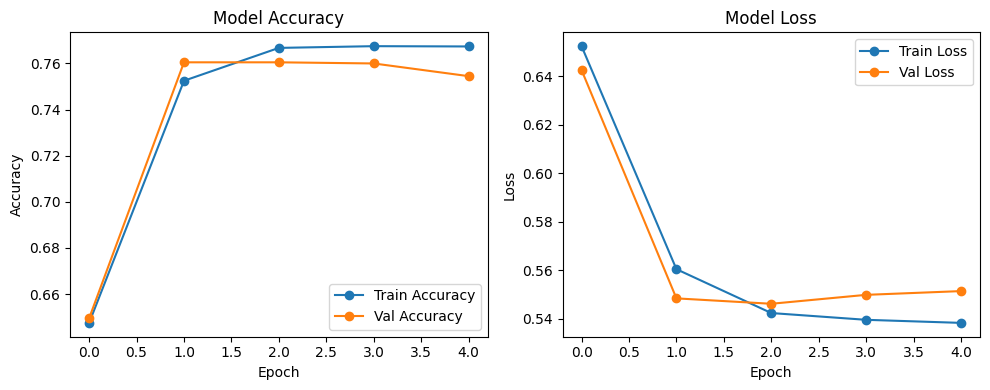

In [28]:
import matplotlib.pyplot as plt

# Accuracy plot
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Val Accuracy', marker='o')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Val Loss', marker='o')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [29]:
from sklearn.metrics import classification_report

y_pred = model.predict([X1_test, X2_test])
y_pred_class = (y_pred > 0.5).astype("int32")

print(classification_report(y_test, y_pred_class))

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
              precision    recall  f1-score   support

           0       0.67      0.59      0.63       701
           1       0.79      0.84      0.82      1299

    accuracy                           0.75      2000
   macro avg       0.73      0.72      0.72      2000
weighted avg       0.75      0.75      0.75      2000



In [30]:
import pickle

# Save tokenizer
with open("tokenizer.pkl", "wb") as f:
    pickle.dump(tokenizer, f)

# Save model
model.save("mismatch_model.h5")

In [31]:
import streamlit as st
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import load_model
import numpy as np
import pickle

# Load tokenizer
with open("tokenizer.pkl", "rb") as f:
    tokenizer = pickle.load(f)

# Load model
model = load_model("mismatch_model.h5")

# Parameters
maxlen = 20

# App UI
st.title("🧪 Medicine Mismatch Detector (DL Model)")
st.markdown("Enter two medicine compositions (separated by '|')")

comp1 = st.text_input("Composition 1", "Paracetamol | Caffeine")
comp2 = st.text_input("Composition 2", "Paracetamol | Ibuprofen")

if st.button("Check Mismatch"):
    # Convert to sequences
    seq1 = tokenizer.texts_to_sequences([comp1])
    seq2 = tokenizer.texts_to_sequences([comp2])

    # Pad
    X1 = pad_sequences(seq1, maxlen=maxlen, padding='post')
    X2 = pad_sequences(seq2, maxlen=maxlen, padding='post')

    # Predict
    pred = model.predict([X1, X2])[0][0]
    if pred > 0.5:
        st.error("Mismatch Detected!")
    else:
        st.success("No Mismatch Detected.")

2025-07-16 12:46:03.348 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-16 12:46:03.554 
  command:

    streamlit run d:\Python312\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-07-16 12:46:03.554 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-16 12:46:03.554 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-16 12:46:03.556 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-16 12:46:03.556 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-16 12:46:03.557 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-16 12:46:03.558 Thread 'MainThread': missing Script

In [32]:
# Select key columns
export_df = pair_df[[
    "drug1", "composition1",
    "drug2", "composition2",
    "mismatch_flag"
]].copy()

# Save to CSV
export_df.to_csv("medicine_mismatch_data.csv", index=False)

In [44]:
results = []

# --- Logistic Regression ---
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)
lr_acc = accuracy_score(y_test, lr_pred)
lr_f1 = f1_score(y_test, lr_pred)

results.append({
    "Model": "Logistic Regression",
    "Accuracy": lr_acc,
    "F1-Score": lr_f1
})

# --- Random Forest ---
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_acc = accuracy_score(y_test, rf_pred)
rf_f1 = f1_score(y_test, rf_pred)

results.append({
    "Model": "Random Forest",
    "Accuracy": rf_acc,
    "F1-Score": rf_f1
})


In [47]:
df_results = pd.DataFrame(results)
print(df_results)


                 Model  Accuracy  F1-Score
0  Logistic Regression     0.765  0.824496
1        Random Forest     0.765  0.824496


In [34]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping


In [35]:
# Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

In [36]:
# Scale
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [37]:
# ml model
models = {
    'Logistic Regression': LogisticRegression(C=0.5, random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(kernel='linear', random_state=42)
}

results = []

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    results.append({'Model': name, 'Accuracy': acc, 'F1 Score': f1})

In [38]:
# Deep Learning model

dl_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

dl_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = dl_model.fit(
    X_train_scaled, y_train, 
    epochs=20, batch_size=32,
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=0
)

d:\Python312\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [39]:
# Predict
dl_pred_prob = dl_model.predict(X_test_scaled)
dl_pred = (dl_pred_prob > 0.5).astype(int)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


In [40]:
# Calculate scores
acc = accuracy_score(y_test, dl_pred)
f1 = f1_score(y_test, dl_pred)
results.append({'Model': 'Deep Learning (Dense NN)', 'Accuracy': acc, 'F1 Score': f1})

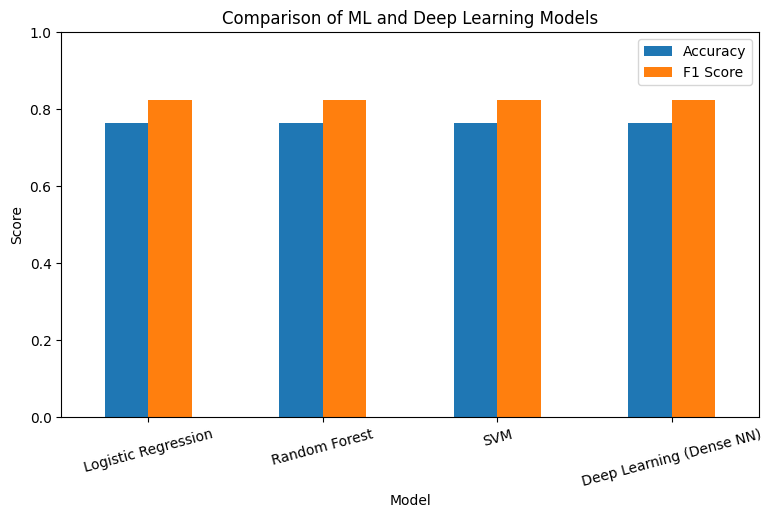

In [41]:
# Plot

df_results = pd.DataFrame(results)

df_results.plot(x='Model', y=['Accuracy', 'F1 Score'], kind='bar', figsize=(9,5))
plt.title('Comparison of ML and Deep Learning Models')
plt.ylabel('Score')
plt.ylim(0,1)
plt.xticks(rotation=15)
plt.show()